# Accessing cloud satellite data

- Funding: Interagency Implementation and Advanced Concepts Team [IMPACT](https://earthdata.nasa.gov/esds/impact) for the Earth Science Data Systems (ESDS) program and AWS Public Dataset Program
  
### Credits: Tutorial development
* [Dr. Chelle Gentemann](mailto:gentemann@faralloninstitute.org) -  [Twitter](https://twitter.com/ChelleGentemann)   - Farallon Institute
* [Lucas Sterzinger](mailto:lsterzinger@ucdavis.edu) - [Twitter](https://twitter.com/lucassterzinger) - University of California, Davis

### Satellite data

Satellite data come from either polar or low inclination orbits that circle the Earth or geostationary orbits that hold a location above a specific location on the Earth, near the Equator.  The type of data from satellites depends on both the orbit and the type of instrument.  There are definitions for the different satellite data types.
- L1 - satellite observations, usually each observation has a lat/lon/time associated with it
- L2 - derived geophysical retrievals (eg. SST), still with lat/lon/time
- L3 - variables mapped to a uniform space/time grid
- L4 - model output or analysis of data, may include multiple sensors

There are several different formats that satellite data:  [netCDF](https://www.unidata.ucar.edu/software/netcdf/), [HDF5](https://www.hdfgroup.org/solutions/hdf5/), and [geoTIFF](https://earthdata.nasa.gov/esdis/eso/standards-and-references/geotiff).
There are also som newer cloud optimized formats that data: [Zarr](https://zarr.readthedocs.io/en/stable/), Cloud Optimized GeoTIFF ([COG](https://www.cogeo.org/)).

### Understand the data
Data access can be easy and fast on the cloud, but to avoid potential issues down the road, spend time to understand the strengths and weaknesses of any data.  Any science results will need to address uncertainties in the data, so it is easier to spend time at the beginning to understand them and avoid data mis-application.

#### This tutorial will focus on netCDF/HDF5/Zarr

### Data proximate computing
These are BIG datasets that you can analyze on the cloud without downloading the data.  
You can run this on your phone, a Raspberry Pi, laptop, or desktop.   
By using public cloud data, your science is reproducible and easily shared!

The OHW Jupyter Hub is a m5.2xlarge instance shared by up to 4 users.  What does that mean?  [m5.2xlarge](https://aws.amazon.com/ec2/instance-types/m5/) has 8 vCPU and 32 GB memory.
If there are 3 other users on your node, then the memory could be used up fast by large satellite datasets, so just be a little aware of that when you want to run something....

### Here we will demonstrate some ways to access the different SST datasets on AWS:
- AWS MUR sea surface temperatures  (L4)
- AWS GOES sea surface temperatures  (L2)
- AWS Himawari sea surface temperatures (L2 and L3)
- ERA5 data (L4)

### To run this notebook

Code is in the cells that have <span style="color: blue;">In [  ]:</span> to the left of the cell and have a colored background

To run the code:
- option 1) click anywhere in the cell, then hold `shift` down and press `Enter`
- option 2) click on the Run button at the top of the page in the dashboard

Remember:
- to insert a new cell below press `Esc` then `b`
- to delete a cell press `Esc` then `dd`

### First start by importing libraries


# How to find an AWS Public Dataset

- Click here: [AWS Public Dataset](https://aws.amazon.com/opendata/)




-------------------------------------------------------





- Click on `Find public available data on AWS` button
- Search for MUR
- Select [MUR SST](https://registry.opendata.aws/mur/)

 
 
 
 

-------------------------------------------------------

![](./awsmur.png)










## [MUR SST](https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST) [AWS Public dataset program](https://registry.opendata.aws/mur/) 

### Access the MUR SST Zarr store which is in an s3 bucket.  

![image](https://podaac.jpl.nasa.gov/Podaac/thumbnails/MUR-JPL-L4-GLOB-v4.1.jpg)

We will start with my favorite Analysis Ready Data (ARD) format: [Zarr](https://zarr.readthedocs.io/en/stable/).  Using data stored in Zarr is fast, simple, and contains all the metadata normally in a netcdf file, so you can figure out easily what is in the datastore.  

- Fast - Zarr is fast because all the metadata is consolidated into a .json file.  Reading in massive datasets is lightning fast because it only reads the metadata and does read in data until it needs it for compute.

- Simple - Filenames?  Who needs them? Who cares?  Not I.  Simply point your read routine to the data directory.

- Metadata - all you want!

In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 


[fsspec.get_mapper](https://filesystem-spec.readthedocs.io/en/latest/api.html?highlight=get_mapper#fsspec.get_mapper) Creates a mapping between your computer and the s3 bucket.  This isn't necessary if the Zarr file is stored locally.

[xr.open_zarr](http://xarray.pydata.org/en/stable/generated/xarray.open_zarr.html) Reads a Zarr store into an Xarray dataset


In [2]:
%%time
file_location = 's3://mur-sst/zarr'

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

CPU times: user 3.04 s, sys: 111 ms, total: 3.15 s
Wall time: 3.98 s


,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


### Read entire 10 years of data at 1 point.

Select the ``analysed_sst`` variable over a specific time period, `lat`, and `lon` and load the data into memory.  This is small enough to load into memory which will make calculating climatologies easier in the next step.

CPU times: user 348 ms, sys: 193 ms, total: 541 ms
Wall time: 2.17 s


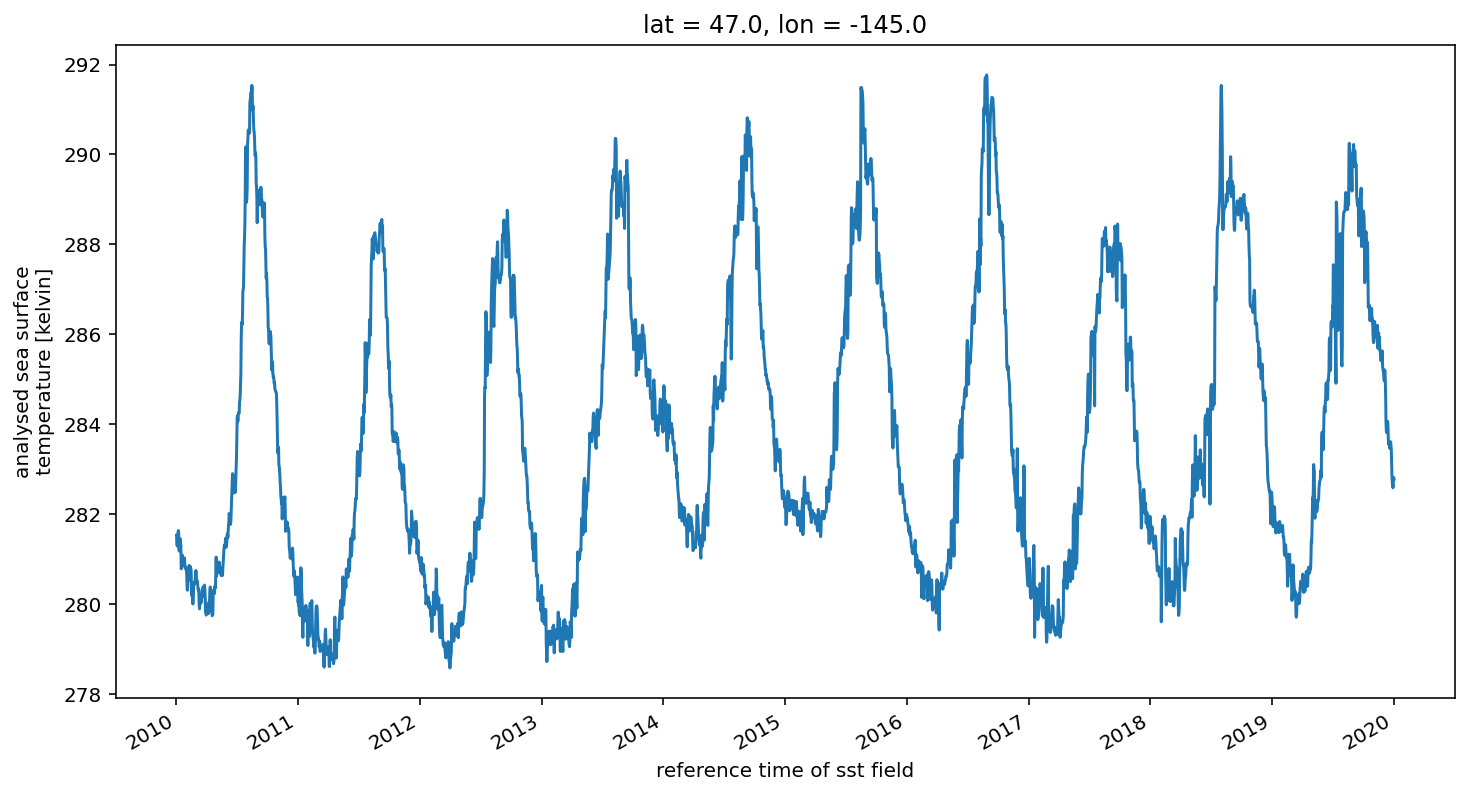

In [3]:
%%time

sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 47,
                                            lon  = -145
                                           ).load()

sst_timeseries.plot()

### The anomaly is more interesting...  

Use [.groupby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html#xarray-dataarray-groupby) method to calculate the climatology and [.resample](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html#xarray-dataset-resample) method to then average it into 1-month bins.
- [DataArray.mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html#xarray-dataarray-mean) arguments are important! Xarray uses metadata to plot, so keep_attrs is a nice feature.  Also, for SST there are regions with changing sea ice.  Setting skipna = False removes these regions. 

CPU times: user 542 ms, sys: 8.22 ms, total: 551 ms
Wall time: 548 ms


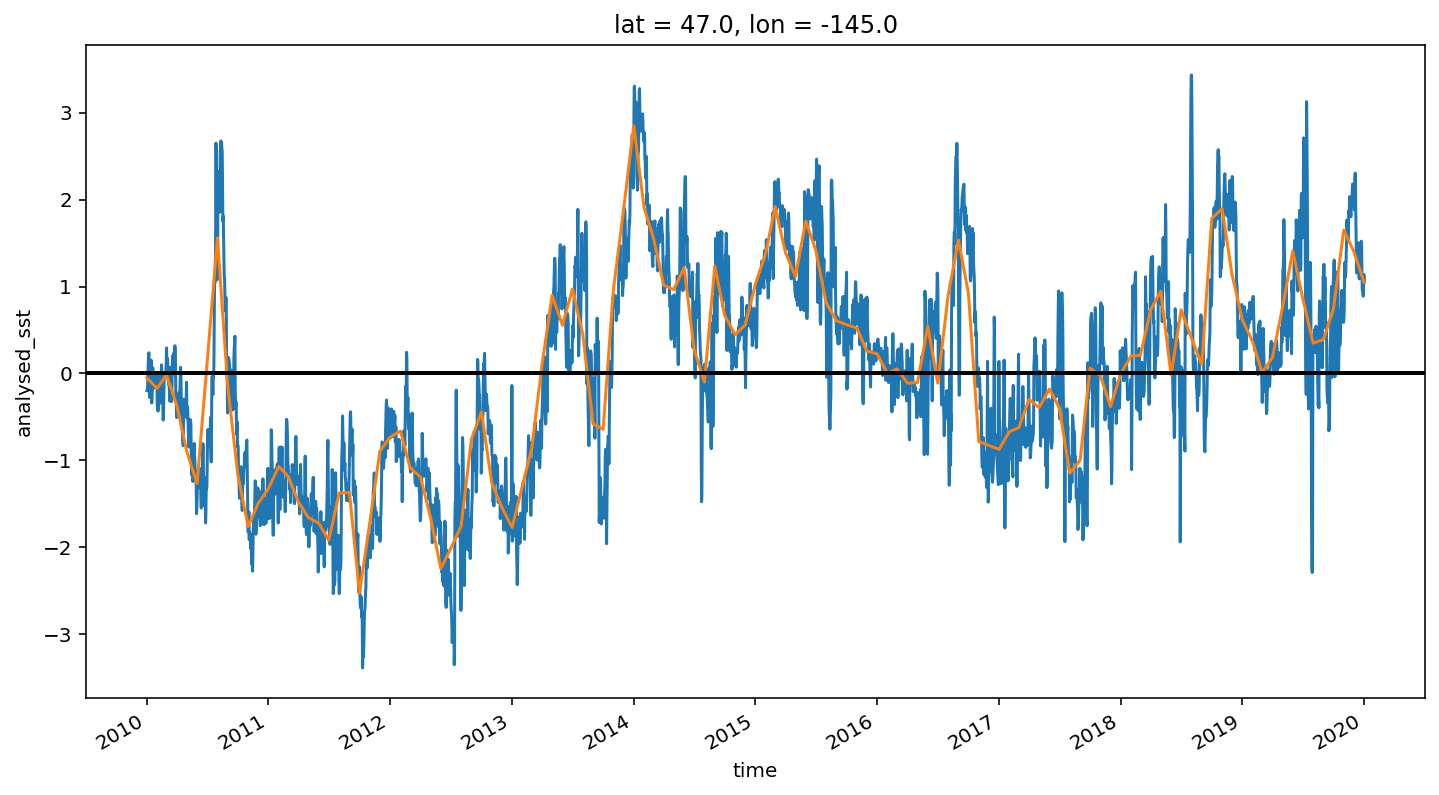

In [4]:
%%time

sst_climatology = sst_timeseries.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)

sst_anomaly = sst_timeseries.groupby('time.dayofyear')-sst_climatology

sst_anomaly_monthly = sst_anomaly.resample(time='1MS').mean(keep_attrs=True,skipna=False)

#plot the data
sst_anomaly.plot()
sst_anomaly_monthly.plot()
plt.axhline(linewidth=2,color='k')

# Chukchi Sea SST timeseries

# Note SST is set to -1.8 C (271.35 K) when ice is present

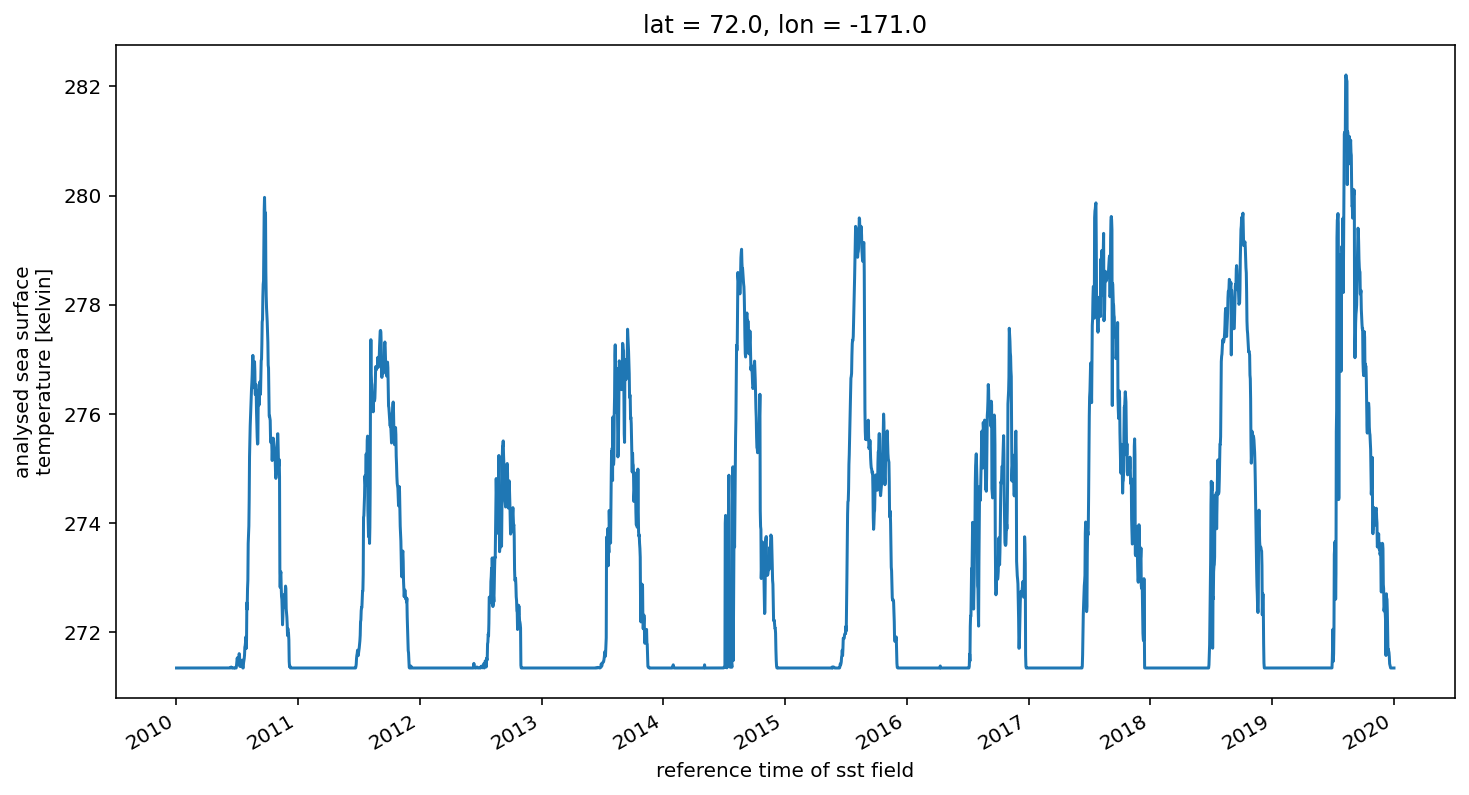

In [5]:
sst_timeseries = ds_sst['analysed_sst'].sel(time = slice('2010-01-01','2020-01-01'),
                                            lat  = 72,
                                            lon  = -171
                                           ).load()

sst_timeseries.plot()

# Grid resolution does NOT equal spatial resolution

- many L4 SST analyses blend infrared (~ 1 - 4 km data) with passive microwave (~ 50 km) data.  Data availability will determine regional / temporal changes in spatial resolution

- many L4 SST analyses apply smoothing filters that may further reduce resolution

CPU times: user 8.84 s, sys: 5.55 s, total: 14.4 s
Wall time: 17.4 s


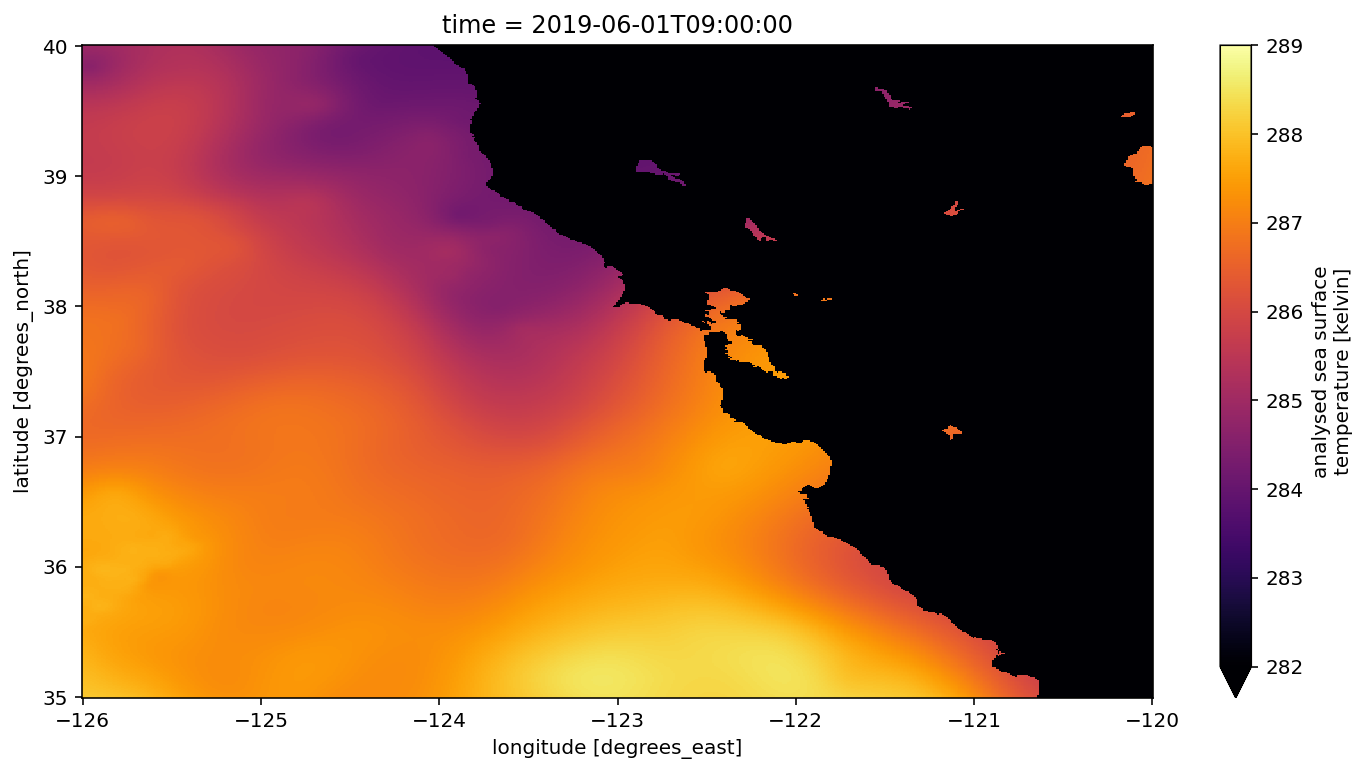

In [6]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')

CPU times: user 8.82 s, sys: 4.8 s, total: 13.6 s
Wall time: 13.9 s


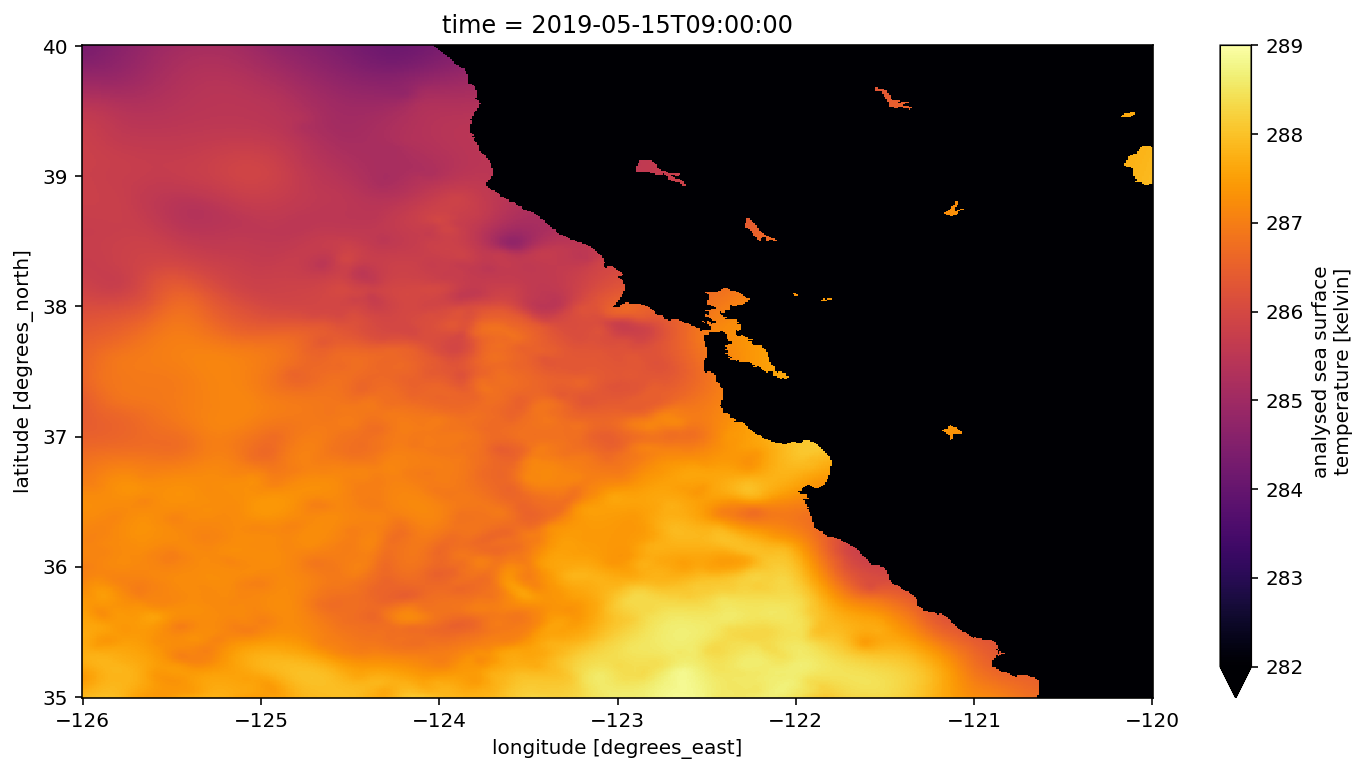

In [7]:
%%time

subset = ds_sst['analysed_sst'].sel(time='2019-05-15',lat=slice(35,40),lon=slice(-126,-120))

subset.plot(vmin=282,vmax=289,cmap='inferno')

# How to find an AWS Public Dataset

- click here: [AWS Public Dataset](https://aws.amazon.com/opendata/)


- Click on `Find public available data on AWS` button
- Search for GOES
- Select [GOES-16 and GOES-17](https://registry.opendata.aws/noaa-goes/)
![](./aws.png)


## NETCDF GEO DATA

## Zarr made it seem so easy to read and access cloud SST data! 
## It is always that easy, right?

- When data is just dumped on the cloud, it is still useful, but can be challenging to use.  
Which brings us to GOES SSTs.....

- Info on the data is here -- GOES has a lot of different parameters and they are all stored in different files with names that are difficult to understand.  There are *80* different data products.  This link lists them all and explains the different directory names. [AWS info on GOES SST data](https://docs.opendata.aws/noaa-goes16/cics-readme.html).  

- The GOES data is netCDF format.  There is a different for each of the 80 projects for year/day/hour.  A lot of files.  I find it really useful to 'browse' s3: buckets so that I can understand the directory and data structure.  [Explore S3 structure](https://noaa-goes16.s3.amazonaws.com/index.html).  The directory structure is `<Product>/<Year>/<Day of Year>/<Hour>/<Filename>`

- In the code below we are going to create a function that searches for all files from a certain day, then creates the keys to opening them.  The files are so messy that opening a day takes a little while.  There are other ways you could write this function depending on what your analysis goals are, this is just one way to get some data in a reasonable amount of time. 
- This function uses 
- [`s3fs.S3FileSystem`](https://s3fs.readthedocs.io/en/latest/) which holds a connection with a s3 bucket and allows you to list files, etc.  
- [`xr.open_mfdataset`](http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html#xarray.open_mfdataset) opens a list of filenames and concatenates the data along the specified dimensions  

Website [https://registry.opendata.aws/noaa-goes/](https://registry.opendata.aws/noaa-goes/)


In [8]:
def get_geo_data(sat,lyr,idyjl):
    # arguments
    # sat   goes-east,goes-west,himawari
    # lyr   year
    # idyjl day of year
    
    d = dt.datetime(lyr,1,1) + dt.timedelta(days=idyjl)
    fs = s3fs.S3FileSystem(anon=True) #connect to s3 bucket!

    #create strings for the year and julian day
    imon,idym=d.month,d.day
    syr,sjdy,smon,sdym = str(lyr).zfill(4),str(idyjl).zfill(3),str(imon).zfill(2),str(idym).zfill(2)
    
    #use glob to list all the files in the directory
    if sat=='goes-east':
        file_location,var = fs.glob('s3://noaa-goes16/ABI-L2-SSTF/'+syr+'/'+sjdy+'/*/*.nc'),'SST'
    if sat=='goes-west':
        file_location,var = fs.glob('s3://noaa-goes17/ABI-L2-SSTF/'+syr+'/'+sjdy+'/*/*.nc'),'SST'
    if sat=='himawari':
        file_location,var = fs.glob('s3://noaa-himawari8/AHI-L2-FLDK-SST/'+syr+'/'+smon+'/'+sdym+'/*/*L2P*.nc'),'sea_surface_temperature'
    
    #make a list of links to the file keys
    if len(file_location)<1:
        return file_ob
    file_ob = [fs.open(file) for file in file_location]        #open connection to files
    
    #open all the day's data
    ds = xr.open_mfdataset(file_ob,combine='nested',concat_dim='time') #note file is super messed up formatting
    
    #clean up coordinates which are a MESS in GOES
    #rename one of the coordinates that doesn't match a dim & should
    if not sat=='himawari':
        ds = ds.rename({'t':'time'})
        ds = ds.reset_coords()
    else:
        ds = ds.rename({'ni':'x','nj':'y'})
    
    #put in to Celsius
    #ds[var] -= 273.15   #nice python shortcut to +- from itself a-=273.15 is the same as a=a-273.15
    #ds[var].attrs['units'] = '$^\circ$C'
   
    return ds


## Open a day of GOES-16  (East Coast) Data

In [9]:
%%time
lyr, idyjl = 2020, 210  #may 30, 2020

ds = get_geo_data('goes-east',lyr,idyjl)

ds

CPU times: user 19.9 s, sys: 7.39 s, total: 27.3 s
Wall time: 4min 20s


<xarray.Dataset>
Dimensions:                                                 (SST_day_night_emissive_bands: 4, SST_night_only_emissive_band: 1, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, time: 24, x: 5424, y: 5424)
Coordinates:
  * time                                                    (time) datetime64[ns] ...
  * y                                                       (y) float32 0.151...
  * x                                                       (x) float32 -0.15...
Dimensions without coordinates: SST_day_night_emissive_bands, SST_night_only_emissive_band, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables:
    SST                                                     (time, y, x) float32 dask.array<chunksize=(1, 5424, 5424), meta=np.ndarray>
    DQF                                                     (time, y, x) float32 dask.array<chunksize=(1, 5424, 5424), meta=np.ndarray>
    time_bounds                                             (time, number_of_time_bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    goes_imager_projection                                  (time) int32 -214...
    y_image                                                 float32 0.0
    y_image_bounds                                          (time, number_of_image_bounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    x_image                                                 float32 0.0
    x_image_bounds                                          (time, number_of_image_bounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    nominal_satellite_subpoint_lat                          (time) float64 0....
    nominal_satellite_subpoint_lon                          (time) float64 -7...
    nominal_satellite_height                                (time) float64 3....
    geospatial_lat_lon_extent                               (time) float32 9....
    total_number_of_good_quality_ocean_pixels               (time) float64 3....
    total_number_of_degraded_quality_ocean_pixels           (time) float64 5....
    total_number_of_severely_degraded_quality_ocean_pixels  (time) float64 1....
    total_number_of_unprocessed_pixels                      (time) float64 1....
    number_of_day_SST_pixels                                (time) float64 7....
    number_of_night_SST_pixels                              (time) float64 2....
    number_of_twilight_SST_pixels                           (time) float64 1....
    sea_surface_temp_outlier_pixel_count                    (time) float64 1....
    minimum_sea_surface_temp                                (time) float64 19...
    maximum_sea_surface_temp                                (time) float64 31...
    mean_sea_surface_temp                                   (time) float64 28...
    standard_deviation_sea_surface_temp                     (time) float64 16...
    min_obs_modeled_diff_SST_night_only_emissive_band       (time) float64 -5...
    max_obs_modeled_diff_SST_night_only_emissive_band       (time) float64 5....
    mean_obs_modeled_diff_SST_night_only_emissive_band      (time) float64 -0...
    std_dev_obs_modeled_diff_SST_night_only_emissive_band   (time) float64 0....
    min_retrieved_Reynolds_SST_diff                         (time) float64 -3...
    max_retrieved_Reynolds_SST_diff                         (time) float64 14...
    mean_retrieved_Reynolds_SST_diff                        (time) float64 0....
    std_dev_retrieved_Reynolds_SST_diff                     (time) float64 0....
    algorithm_dynamic_input_data_container                  (time) int32 -214...
    processing_parm_version_container                       (time) int32 -214...
    algorithm_product_version_container                     (time) int32 -214...
    retrieval_local_zenith_angle                            float32 90.0
    quantitative_local_zenith_angle                         float32 

CPU times: user 6.29 s, sys: 3.11 s, total: 9.41 s
Wall time: 1min 41s


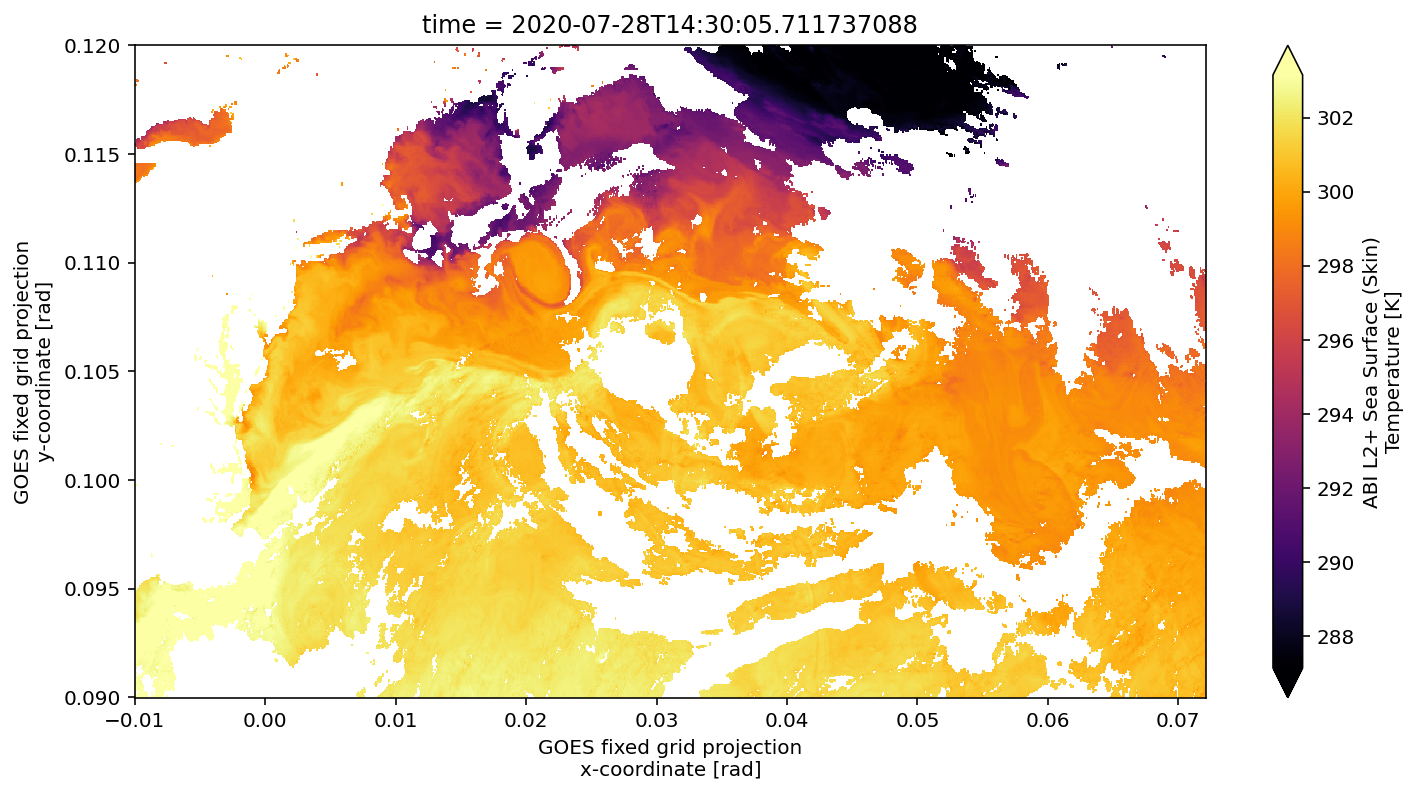

In [10]:
%%time
subset = ds.sel(x=slice(-0.01,0.07215601),y=slice(0.12,0.09))  #reduce to GS region

masked = subset.SST.where(subset.DQF==0)

masked.isel(time=14).plot(vmin=14+273.15,vmax=30+273.15,cmap='inferno')

In [11]:
# %%time

# mean_dy = masked.mean('time',skipna=True)   #here I want all possible values so skipna=True

# mean_dy.plot(vmin=14+273.15,vmax=30+273.15,cmap='inferno')

## Lat/Lon
The data above is on the GOES grid, which isn't very helpful if you want to make a subset by a known lat/lon or to plot borders with Cartopy.

The function below takes in a GOES-16/17 dataset and returns the same dataset with latitude (`lat`) and longitude (`lon`) added as 2D coordinate arrays. The math to do this was taken from https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm 

In [12]:
def calc_latlon(ds):
    x = ds.x
    y = ds.y
    goes_imager_projection = ds.goes_imager_projection
    
    x,y = np.meshgrid(x,y)
    
    r_eq = goes_imager_projection.attrs["semi_major_axis"]
    r_pol = goes_imager_projection.attrs["semi_minor_axis"]
    l_0 = goes_imager_projection.attrs["longitude_of_projection_origin"] * (np.pi/180)
    h_sat = goes_imager_projection.attrs["perspective_point_height"]
    H = r_eq + h_sat
    
    a = np.sin(x)**2 + (np.cos(x)**2 * (np.cos(y)**2 + (r_eq**2 / r_pol**2) * np.sin(y)**2))
    b = -2 * H * np.cos(x) * np.cos(y)
    c = H**2 - r_eq**2
    
    r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    
    s_x = r_s * np.cos(x) * np.cos(y)
    s_y = -r_s * np.sin(x)
    s_z = r_s * np.cos(x) * np.sin(y)
    
    lat = np.arctan((r_eq**2 / r_pol**2) * (s_z / np.sqrt((H-s_x)**2 +s_y**2))) * (180/np.pi)
    lon = (l_0 - np.arctan(s_y / (H-s_x))) * (180/np.pi)
    
    ds = ds.assign_coords({
        "lat":(["y","x"],lat),
        "lon":(["y","x"],lon)
    })
    ds.lat.attrs["units"] = "degrees_north"
    ds.lon.attrs["units"] = "degrees_east"

    return ds

In [13]:
ds_latlon = calc_latlon(ds)

ds_latlon

<xarray.Dataset>
Dimensions:                                                 (SST_day_night_emissive_bands: 4, SST_night_only_emissive_band: 1, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, time: 24, x: 5424, y: 5424)
Coordinates:
  * time                                                    (time) datetime64[ns] ...
  * y                                                       (y) float32 0.151...
  * x                                                       (x) float32 -0.15...
    lat                                                     (y, x) float64 na...
    lon                                                     (y, x) float64 na...
Dimensions without coordinates: SST_day_night_emissive_bands, SST_night_only_emissive_band, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables:
    SST                                                     (time, y, x) float32 dask.array<chunksize=(1, 5424, 5424), meta=np.ndarray>
    DQF                                                     (time, y, x) float32 dask.array<chunksize=(1, 5424, 5424), meta=np.ndarray>
    time_bounds                                             (time, number_of_time_bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    goes_imager_projection                                  (time) int32 -214...
    y_image                                                 float32 0.0
    y_image_bounds                                          (time, number_of_image_bounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    x_image                                                 float32 0.0
    x_image_bounds                                          (time, number_of_image_bounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    nominal_satellite_subpoint_lat                          (time) float64 0....
    nominal_satellite_subpoint_lon                          (time) float64 -7...
    nominal_satellite_height                                (time) float64 3....
    geospatial_lat_lon_extent                               (time) float32 9....
    total_number_of_good_quality_ocean_pixels               (time) float64 3....
    total_number_of_degraded_quality_ocean_pixels           (time) float64 5....
    total_number_of_severely_degraded_quality_ocean_pixels  (time) float64 1....
    total_number_of_unprocessed_pixels                      (time) float64 1....
    number_of_day_SST_pixels                                (time) float64 7....
    number_of_night_SST_pixels                              (time) float64 2....
    number_of_twilight_SST_pixels                           (time) float64 1....
    sea_surface_temp_outlier_pixel_count                    (time) float64 1....
    minimum_sea_surface_temp                                (time) float64 19...
    maximum_sea_surface_temp                                (time) float64 31...
    mean_sea_surface_temp                                   (time) float64 28...
    standard_deviation_sea_surface_temp                     (time) float64 16...
    min_obs_modeled_diff_SST_night_only_emissive_band       (time) float64 -5...
    max_obs_modeled_diff_SST_night_only_emissive_band       (time) float64 5....
    mean_obs_modeled_diff_SST_night_only_emissive_band      (time) float64 -0...
    std_dev_obs_modeled_diff_SST_night_only_emissive_band   (time) float64 0....
    min_retrieved_Reynolds_SST_diff                         (time) float64 -3...
    max_retrieved_Reynolds_SST_diff                         (time) float64 14...
    mean_retrieved_Reynolds_SST_diff                        (time) float64 0....
    std_dev_retrieved_Reynolds_SST_diff                     (time) float64 0....
    algorithm_dynamic_input_data_container                  (time) int32 -214...
    processing_parm_version_container                       (time) int32 -214...
    algorithm_product_version_container                     

### It's really slow to use `.where()` to select data 
e.g. 
```python
subset = ds.where((ds.lon >= lon1) & (ds.lon <= lon2) & (ds.lat >= lat1) & (ds.lat <= lat2), drop=True)
```

Instead, we can create a function that will return the x/y min and max so we can continue to use `.isel()` to quickly select data.

_note: the `y` slice must be done as `slice(y2,y1)` since the y coordinate is decreasing, so the larger value must come first._

In [14]:
def get_xy_from_latlon(ds, lats, lons):
    lat1, lat2 = lats
    lon1, lon2 = lons

    lat = ds.lat.data
    lon = ds.lon.data
    
    x = ds.x.data
    y = ds.y.data
    
    x,y = np.meshgrid(x,y)
    
    x = x[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)]
    y = y[(lat >= lat1) & (lat <= lat2) & (lon >= lon1) & (lon <= lon2)] 
    
    return ((min(x), max(x)), (min(y), max(y)))

### Now that we have a min/max `x` and `y`, we can subset in the same was as above

In [15]:
lats = (31, 53)
lons = (-85, -56)

(x1,x2), (y1,y2) = get_xy_from_latlon(ds_latlon, lats, lons)
subset = ds_latlon.isel(time=14).sel(x=slice(x1,x2), y=slice(y2,y1))

subset

<xarray.Dataset>
Dimensions:                                                 (SST_day_night_emissive_bands: 4, SST_night_only_emissive_band: 1, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 1315, y: 776)
Coordinates:
    time                                                    datetime64[ns] 20...
  * y                                                       (y) float32 0.131...
  * x                                                       (x) float32 -0.02...
    lat                                                     (y, x) float64 53...
    lon                                                     (y, x) float64 -9...
Dimensions without coordinates: SST_day_night_emissive_bands, SST_night_only_emissive_band, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables:
    SST                                                     (y, x) float32 dask.array<chunksize=(776, 1315), meta=np.ndarray>
    DQF                                                     (y, x) float32 dask.array<chunksize=(776, 1315), meta=np.ndarray>
    time_bounds                                             (number_of_time_bounds) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    goes_imager_projection                                  int32 -2147483647
    y_image                                                 float32 0.0
    y_image_bounds                                          (number_of_image_bounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    x_image                                                 float32 0.0
    x_image_bounds                                          (number_of_image_bounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    nominal_satellite_subpoint_lat                          float64 0.0
    nominal_satellite_subpoint_lon                          float64 -75.2
    nominal_satellite_height                                float64 3.579e+04
    geospatial_lat_lon_extent                               float32 9.969e+36
    total_number_of_good_quality_ocean_pixels               float64 4.22e+06
    total_number_of_degraded_quality_ocean_pixels           float64 5.341e+05
    total_number_of_severely_degraded_quality_ocean_pixels  float64 1.211e+07
    total_number_of_unprocessed_pixels                      float64 1.256e+07
    number_of_day_SST_pixels                                float64 3.829e+06
    number_of_night_SST_pixels                              float64 6.908e+04
    number_of_twilight_SST_pixels                           float64 1.002e+07
    sea_surface_temp_outlier_pixel_count                    float64 1.563e+06
    minimum_sea_surface_temp                                float64 192.7
    maximum_sea_surface_temp                                float64 317.2
    mean_sea_surface_temp                                   float64 286.7
    standard_deviation_sea_surface_temp                     float64 16.39
    min_obs_modeled_diff_SST_night_only_emissive_band       float64 -2.286
    max_obs_modeled_diff_SST_night_only_emissive_band       float64 1.444
    mean_obs_modeled_diff_SST_night_only_emissive_band      float64 -0.17
    std_dev_obs_modeled_diff_SST_night_only_emissive_band   float64 0.3178
    min_retrieved_Reynolds_SST_diff                         float64 -2.673
    max_retrieved_Reynolds_SST_diff                         float64 19.87
    mean_retrieved_Reynolds_SST_diff                        float64 0.06912
    std_dev_retrieved_Reynolds_SST_diff                     float64 0.3115
    algorithm_dynamic_input_data_container                  int32 -2147483647
    processing_parm_version_container                       int32 -2147483647
    algorithm_product_version_container                     int32 -2147483647
    retrieval_local_zenith_angle                            float32 90.0
    quantitative_local_zenith_angle                         float32 67.0
    retrieval_local_zenith_ang

### To plot with Cartopy, axes need to be set up with a projection. More info can be found at https://scitools.org.uk/cartopy/docs/latest/crs/projections.html 

CPU times: user 6.45 s, sys: 2.35 s, total: 8.8 s
Wall time: 1min 14s


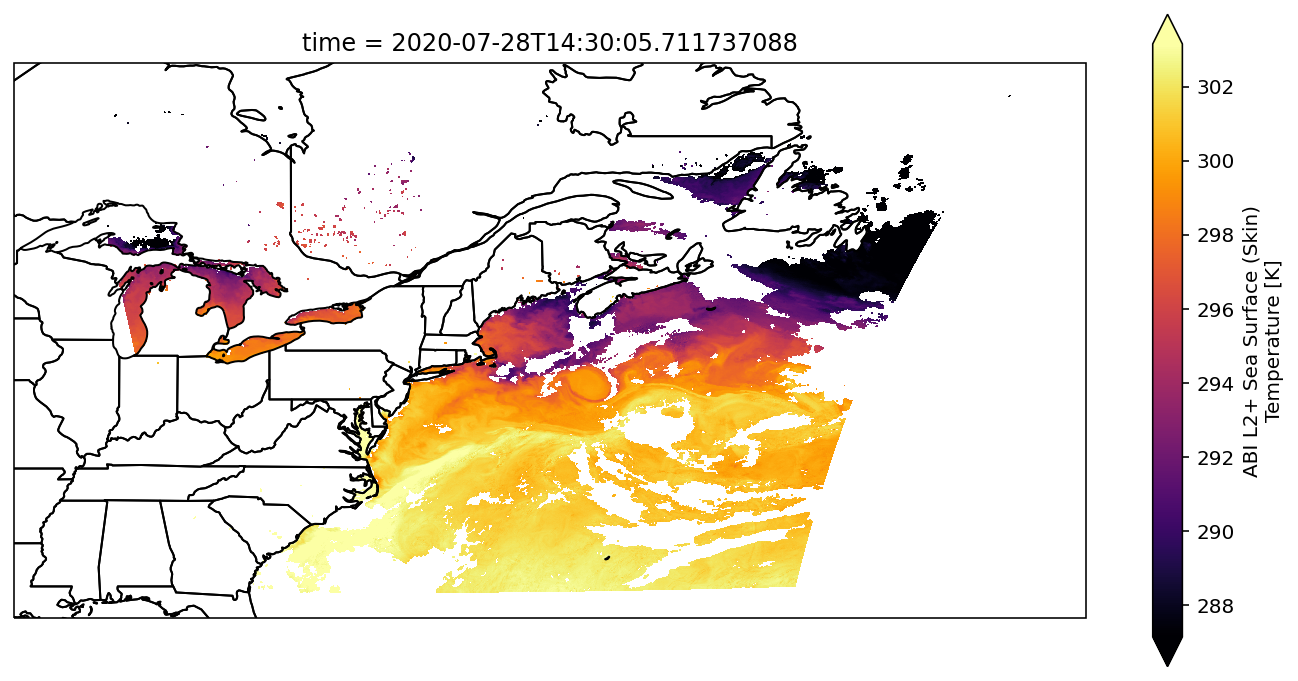

In [16]:
%%time
import cartopy.crs as ccrs
import cartopy.feature as cfeature

masked = subset.where(subset.DQF==0)

fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
masked.SST.plot(x="lon", y="lat", vmin=14+273.15,vmax=30+273.15,cmap='inferno', ax=ax)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

## Read AWS JMA Himawari SSTs
- define a function to get all the filenames for a day
- AWS info on Himawari SST data, [here](https://www.goes.noaa.gov/f_himawari-8.html)
- Explore S3 structure [herePlateCarreeps://noaa-himawari8.s3.amazonaws.com/index.html)
- SSTs are given in L2add_feature3C GHRSST data formats.  
L2P has dims that not mapped to a regular grid.  
L3C is mapped to a grid, with dims lat,lon.

Website [https://registry.opendata.aws/noaa-himawari/](https://registry.opendata.aws/noaa-himawari/)


In [17]:
#%%time
#lyr, idyjl = 2020, 212

#ds = get_geo_data('himawari',lyr,idyjl)

#subset = ds.sel(x=slice(-0.05,0.08),y=slice(0.12,0.08))

#masked = subset.sea_surface_temperature.where(subset.quality_level>=4)

#mean_dy = masked.mean('time',skipna=True)   #here I want all possible values so skipna=True

#mean_dy.plot(vmin=14+273.15,vmax=30+273.15,cmap='inferno')

## ERA5 Data Structure on S3

The ERA5 data is organized into NetCDF files per variable, each containing a month of hourly data. 
The directory structure is `/{year}/{month}/main.nc` for all the variables or `/{year}/{month}/data/{var}.nc` for just a single variable.

Variables:
- snow_density
- sea_surface_temperature
- lwe_thickness_of_surface_snow_amount
- eastward_wind_at_10_metres
- northward_wind_at_10_metres
- time1_bounds
- air_temperature_at_2_metres_1hour_Maximum
- air_temperature_at_2_metres_1hour_Minimum
- precipitation_amount_1hour_Accumulation
- eastward_wind_at_100_metres
- air_temperature_at_2_metres
- dew_point_temperature_at_2_metres
- integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation
- northward_wind_at_100_metres
- air_pressure_at_mean_sea_level
- surface_air_pressure

For example, the full file path for sea surface temperature for January 2008 is:

/2008/01/data/sea_surface_temperature.nc

- Note that due to the nature of the ERA5 forecast timing, which is run twice daily at 06:00 and 18:00 UTC, the monthly data file begins with data from 07:00 on the first of the month and continues through 06:00 of the following month. We'll see this in the coordinate values of a data file we download later in the notebook.

- Granule variable structure and metadata attributes are stored in main.nc. This file contains coordinate and auxiliary variable data. This file is also annotated using NetCDF CF metadata conventions.


In [18]:
def get_era5(var,lyr):
    syr=str(lyr).zfill(4)
    fs = s3fs.S3FileSystem(anon=True)
    if var=='all':
        file_location = fs.glob('s3://era5-pds/'+syr+'/*/*.nc')
    else:
        file_location = fs.glob('s3://era5-pds/'+syr+'/*/data/'+var+'*.nc')
    file_ob = [fs.open(file) for file in file_location]        
    ds=xr.open_mfdataset(file_ob,combine='nested',concat_dim='time0') 
    #ds['sea_surface_temperature']-=273.15
    #ds['sea_surface_temperature'].attrs['units'] = '$^\circ$C'
    return ds

In [19]:
%%time

lyr=2019

ds = get_era5('sea_surface_temperature',lyr)

CPU times: user 1.98 s, sys: 1.04 s, total: 3.03 s
Wall time: 27.6 s


In [20]:
%%time

dy = ds.resample(time0='1D').mean(keep_attrs=True,skipna=False)

dy

CPU times: user 930 ms, sys: 12.1 ms, total: 942 ms
Wall time: 935 ms


<xarray.Dataset>
Dimensions:                  (lat: 721, lon: 1440, time0: 365)
Coordinates:
  * time0                    (time0) datetime64[ns] 2019-01-01 ... 2019-12-31
  * lon                      (lon) float32 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * lat                      (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables:
    sea_surface_temperature  (time0, lat, lon) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts

CPU times: user 1.32 s, sys: 274 ms, total: 1.59 s
Wall time: 9.22 s


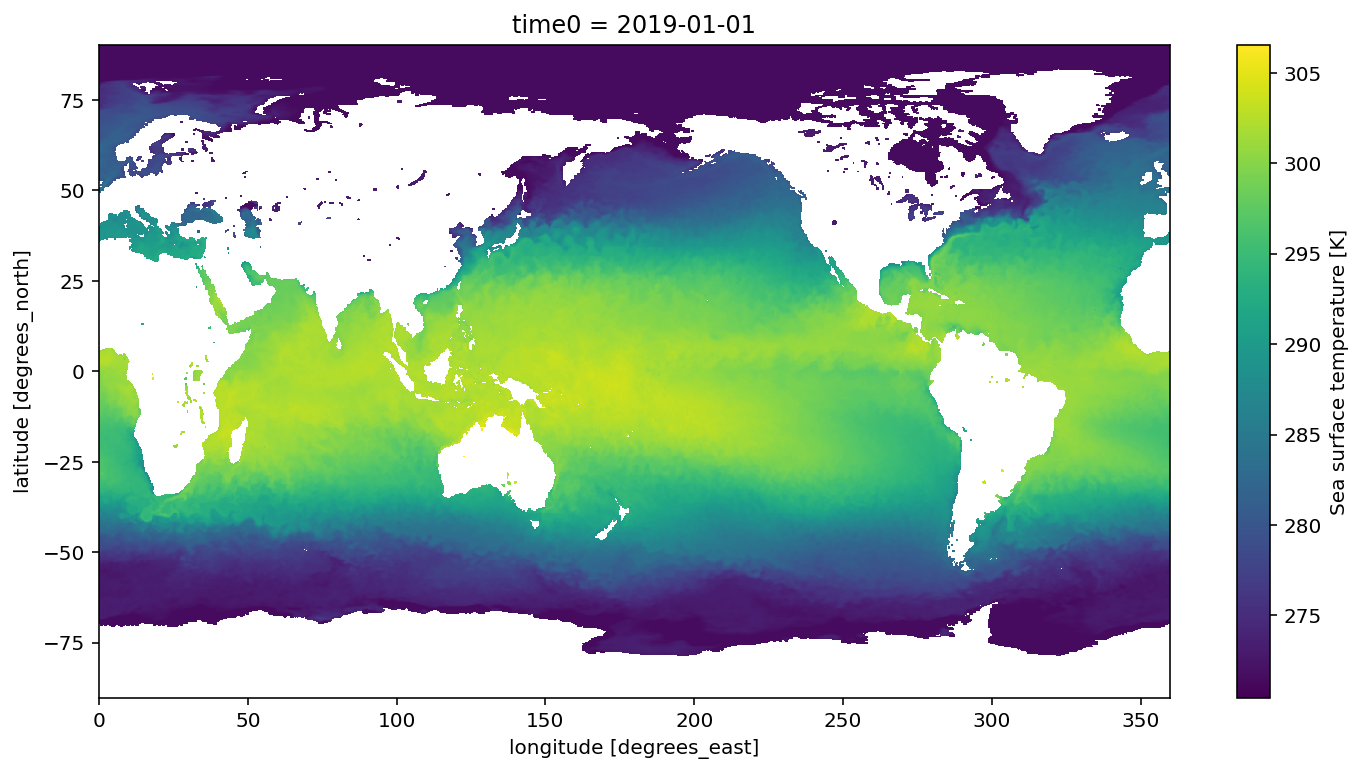

In [21]:
%%time

dy.sea_surface_temperature[0,:,:].plot()

# Change lon from 0 to 360 to -180 to 180

CPU times: user 1.19 s, sys: 242 ms, total: 1.43 s
Wall time: 6.55 s


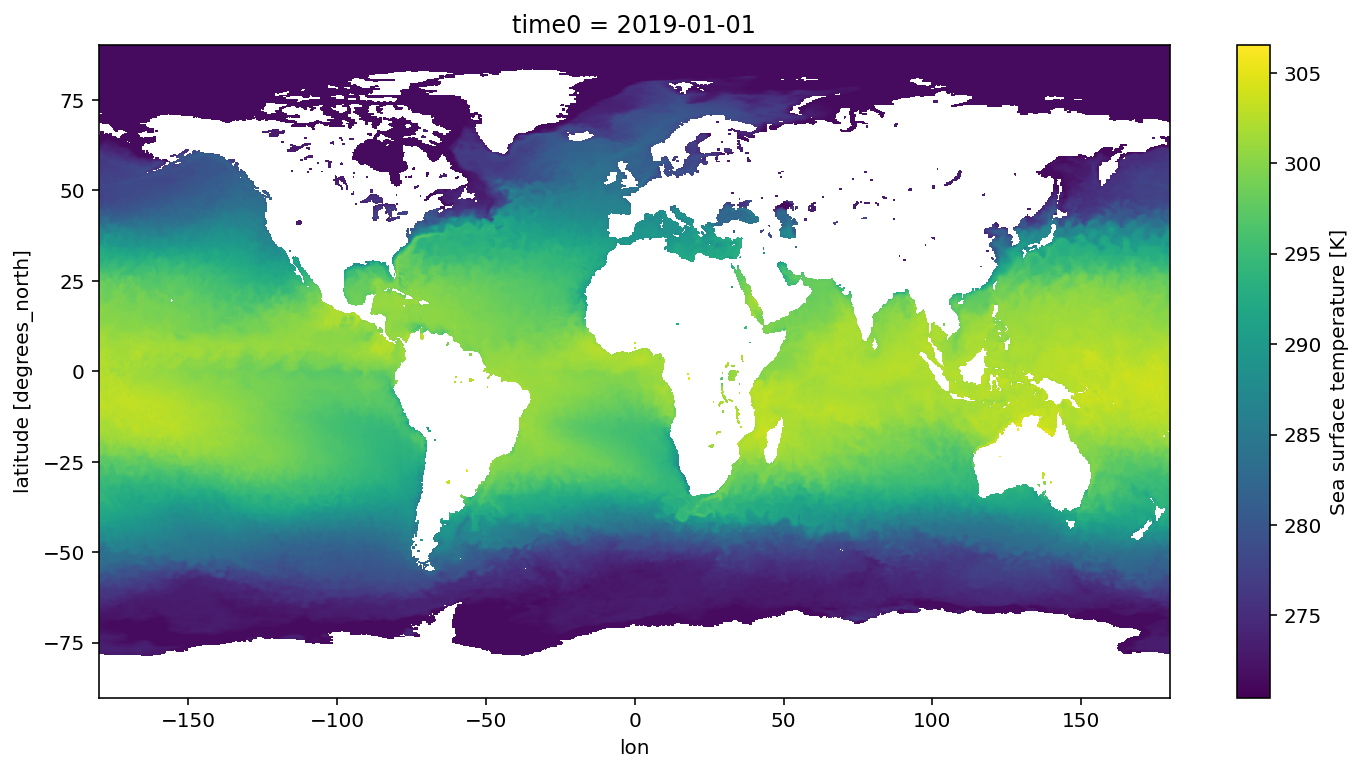

In [22]:
%%time

dy.coords['lon'] = (dy.coords['lon'] + 180) % 360 - 180

dy = dy.sortby(dy.lon)

dy.sea_surface_temperature[0,:,:].plot()